In [38]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import resource
import numpy as np
from skimage import img_as_bool, io, color

soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (hard, hard))

thickTrainDir = "data/train/thick/"
thinTrainDir = "data/train/thin/"
thickValDir = "data/validation/thick/"
thinValDir = "data/validation/thin/"

X_train = []
y_train = []
X_val = []
y_val = []

#thickImgs = os.listdir(thickTrainDir)
#for thickImg in thickImgs:
#    imgPath = thickTrainDir + thickImg
#    if not os.path.isdir(imgPath) :
#        x = load_img(imgPath)
#        x = img_as_bool(color.rgb2gray(io.imread(imgPath)))
#        x_train.append(x)

#x_train = np.array(x_train)

def appendImgs(imglist, labels, directory):
    imgs = os.listdir(directory)
    for img in imgs:
        imgPath = directory + img
        if not os.path.isdir(imgPath) :
            x = load_img(imgPath)
            x = img_as_bool(color.rgb2gray(io.imread(imgPath)))
            imglist.append(x)
            if 'thick' in imgPath:
                labels.append(1)
            elif 'thin' in imgPath:
                labels.append(0)

appendImgs(X_train, y_train, thickTrainDir)
appendImgs(X_train, y_train, thinTrainDir)

appendImgs(X_val, y_val, thickValDir)
appendImgs(X_val, y_val, thinValDir)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_train.shape


#train_thick =   

# create generator
#datagen = ImageDataGenerator()

(2000, 256, 256)

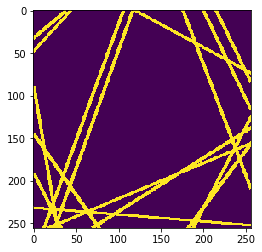

In [46]:
plt.imshow(X_train[-1])

In [6]:
#train_it = datagen.flow_from_directory('data/train/', class_mode='binary')
#val_it = datagen.flow_from_directory('data/validation/', class_mode='binary')

train_it

#import matplotlib.pyplot as plt

#plt.imshow(train_it[0], cmap='gray', vmin=0, vmax=255)
#plt.show()


#batchX, batchy = train_it.next()
#print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 2001 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [48]:
import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import SGD

bs = 32
epochs = 100
lr = 0.01

model = Sequential()
model.add(Flatten(input_shape=X_train[0].shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=SGD(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8388736   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 8,388,994
Trainable params: 8,388,994
Non-trainable params: 0
_________________________________________________________________


In [49]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=epochs, validation_data=[X_val, y_val])

Instructions for updating:
Use tf.cast instead.
Train on 2000 samples, validate on 400 samples
Epoch 1/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6782 - acc: 0.6225 - val_loss: 0.4797 - val_acc: 0.8375
Epoch 2/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4220 - acc: 0.8195 - val_loss: 0.5169 - val_acc: 0.5600
Epoch 3/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3290 - acc: 0.9010 - val_loss: 0.4256 - val_acc: 0.7150
Epoch 4/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2044 - acc: 0.9595 - val_loss: 0.3517 - val_acc: 0.8200
Epoch 5/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1181 - acc: 0.9890 - val_loss: 0.5202 - val_acc: 0.6175
Epoch 6/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0606 - acc: 1.0000 - val_loss: 0.3559 - val_acc: 0.8050
Epoch 7/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0398 - acc: 1.00

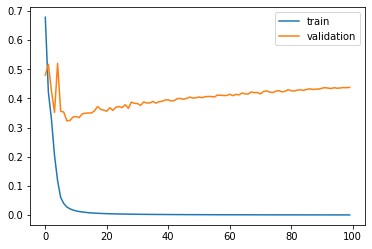

In [50]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend();